I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work.

#Libraries

In [ ]:
import gym
import timeit
import matplotlib.pyplot as plt
from gym import wrappers
import math
from collections import deque
from gym import spaces
import numpy as np

import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import tensorflow as tf
import pandas as pd
import random


In [ ]:
with tf.device('/gpu:0'):
  print("present")
with tf.device('/device:GPU:0'):
  print("Captial GPU")


present
Captial GPU


In [ ]:
# with tf.device('/gpu:0'):
tf.__version__

'2.8.0'

#Part I

##Cart Pole v1

In [ ]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
%matplotlib inline
!pip install gym-algorithmic
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import gym
import pyglet
env = gym.make('CartPole-v1')
env.reset()
print(env.action_space)
print(env.observation_space)


Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


Cart pole v1 main details:

Goal: To keep the pole upright.

Action:
0:Left
1:Right

Observation space:
(Observation,	Min,	Max):

0. (Cart Position,	-4.8,	4.8)

1.	(Cart Velocity,	-Inf,	Inf)
2.	(Pole Angle,	~ -0.418 rad (-24°),	~ 0.418 rad (24°))
3. (Pole Angular Velocity,	-Inf,	Inf)


Rewards:
Reward of +1 for every step taken including the termination step, is allotted. The threshold for rewards is 475 for v1.

Initial State:
All observations are assigned a uniformly random value in (-0.05, 0.05)

Episode Termination Conditions

1. Pole Angle is greater than ±12°
2. Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)
3. Episode length is greater than 500 (200 for v0)


##Mountain Car - v0


In [ ]:
import gym
env = gym.make('MountainCar-v0')
env.reset()
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


Mountain car main details


Goal: The goal is to reach the flag placed on top of the right hill as quickly as possible.

Actions:

0. Accelerate to the left
1. Don't accelerate
2. Accelerate to the right

Observation space:

0. Position of the car along the x-axis
1. Velocity of the car

Reward:

0: if it takes step towards the goal.
-1: if it takes step that isn't towards the goal

Initial State:

The position of the car is assigned a uniform random value in [-0.6 , -0.4]. The starting velocity of the car is always 0.

Episode Termination Conditions:

1. The position of the car is greater than or equal to 0.5 (the goal position on top of the right hill)
2. The length of the episode is 200.

#Part II

##Grid World

In [ ]:
from google.colab import widgets
import time

In [ ]:

class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16) #Intializing a 4x4 grid with 16 states: {s1, s2, s3,....s16}
        self.action_space = spaces.Discrete(4) #Intializing 4 actions:  {0: down, 1: up, 2: right, 3: left}
        self.done = False
        #rewards = {-2, -1, 0, 3, 4, 100} defined below
        
    def reset(self):
  
        self.agent_pos = [0, 0] #start position
        self.goal_pos = [3, 3] #target position (+150)
        self.danger1_pos = [1,1] #first danger position (-1)
        self.danger2_pos = [2,2] #second danger position (-2)
        self.gold1_pos = [2,0] #First positive reward position (+1)
        self.gold2_pos = [3,0] #Second positive reward position (+1)
        self.done = False
        self.state = np.zeros((4,4))
        observation = self.state.flatten()
        return observation
    
    def step(self, action, deterministic = False, stochastic = False):

        #determinstic environment
        if deterministic == True:
          epsilon1, epsilon2 = 1, 1 #With probability 1 Agent chooses given action

        #stochastic environment
        if stochastic == True:
          epsilon1, epsilon2 = 0.7, 0.8 #Transistion probabilites of 0.7 and 0.8 
          #Σ(p(s', r/s, down) = 0.7 + 0.3 = 1
          #Σ(p(s', r/s, right) = 0.8 + 0.2 = 1 

        #Actions
        if action == 0: #down
            rand_num1 = np.random.random()
            if epsilon1 >= rand_num1:  
              self.agent_pos[0] += 1   
            else: #For all states in stochastic environment when Down action is choosen: Agent chooses down state with a transition probability of 0.7 and up state with 0.3 transition probaility
              self.agent_pos[0] -= 1
              # print("Up state is choosen with 0.3 probability instead of Down")

        if action == 1: #up
            self.agent_pos[0] -= 1

        if action == 2: #right
            rand_num2 = np.random.random()
            if epsilon2 >= rand_num2:  
              self.agent_pos[1] += 1        
            else:#For all states in stochastic environment when Right action is choosen: Agent chooses right state with a transition probability of 0.8 and left state with 0.2 transition probaility
              self.agent_pos[1] -= 1
              # print("Left state is choosen with 0.2 probability instead of Right")

        if action == 3: #left
            self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3) #ensuring agent doesn't go out of the grid #One of the ways to ensure safety in the environment
        self.state = np.zeros((4,4))

        observation = self.state.flatten()
        
        reward = 0 #Intializing reward to zero
        if (self.agent_pos == self.goal_pos).all():
            reward = 150 #A reward of 150 if it reaches target position
            self.done = True

        #Rewards structure
        elif (self.agent_pos == self.danger1_pos).all():
            reward = -1 #A negative reward -1 if it enters 1st danger position

        elif (self.agent_pos == self.danger2_pos).all():
            reward = -2 #A negative reward of -2 if it enters 2nd danger position

        elif (self.agent_pos == self.gold1_pos).all():
            reward = 1 #A reward of +1 at [2,0]

        elif (self.agent_pos == self.gold2_pos).all():
            reward = 2 #A reward of +2 at [3,0]

        return reward, self.agent_pos, self.done
        
    def render(self):
        plt.imshow(self.state)

In [ ]:
class RandomAgent: #Definig the Random agent class
    def __init__(self, env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space

    def step(self, observation): #Just for reference I have developed action space in algorithm #Random agent chooses random action every time we call step method
        return np.random.choice(self.action_space.n)

In [ ]:
env = GridEnvironment()
# agent = RandomAgent(env)#creating a random agent to explore the given environments 
obs = env.reset()#resets the environment to its initial configuration

#Displays grid in its intial configuration
print("Grid Environment\n")
output_grid2 = widgets.Grid(4, 4, header_row=True, header_column=True,  style='background-color: black; font-size: 25px; color: white')
print("\n")
with output_grid2.output_to(0, 0):
    print("Start")
with output_grid2.output_to(3, 3):
    print("Target")
with output_grid2.output_to(1, 1):
    print("-1")
with output_grid2.output_to(2, 2):
    print("-2")
with output_grid2.output_to(2, 0):
    print("+1")
with output_grid2.output_to(3, 0):
    print("+2")

Grid Environment



,,,
,,,
,,,
,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Start


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Target


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

+1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

+2


<IPython.core.display.Javascript object>

In [ ]:
test_states = [x for x in range(env.observation_space.n)]
test_states = tf.keras.utils.to_categorical(test_states)
# test_states

##DQN Algorithm

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1088      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3,300
Trainable params: 3,300
Non-trainable params: 0
_________________________________________________________________
Episode: 1, total_reward: -33
Episode: 125, total_reward: -4
Episode: 250, total_reward: 134
Episode: 375, total_reward: 130
Episode: 500, total_reward: -31
Episode: 625, total_reward: 140
Episode: 750, total_reward: 132
Episode: 875, total_reward: 145
Episode: 1000, total_reward: 145
Episode: 1125, total_reward: 1

Text(0.5, 1.0, 'Rewards per episode')

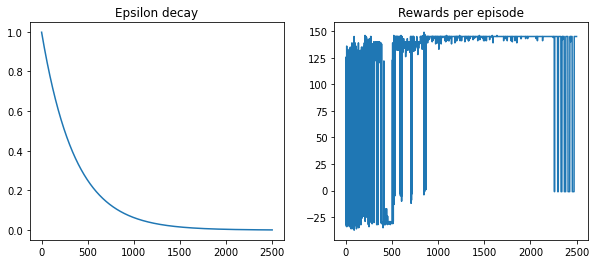

In [ ]:
#DQN Algorithm

class DQN_algo:

  def __init__(self, states, actions):
    self.states = states
    self.actions = actions
    self.replay_mem = deque(maxlen = 2000)

    self.discount_rate = 0.99
    self.epsilon = 1

    #Policy and target networks
    self.policy_model = self.nnmodel()
    self.target_model = self.nnmodel()

    self.target_model.set_weights(self.policy_model.get_weights())
    self.policy_model.summary()

  def nnmodel(self):
    model = Sequential()

    model.add(Dense(64, activation='relu', input_dim = 16)) #first hidden layer with 32 nodes taking input from 16 - one hot vector of a state
    model.add(Dense(32, activation='relu')) #first hidden layer with 28 nodes taking input from the first dense layer
    model.add(Dense(4, activation='linear')) #output layers has q value for 4 actions
    model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.001))
    return model

  def store(self, state, action, reward, next_state, done):
   self.replay_mem.append((state, action, reward, next_state, done))

  def act(self, state, eval = False):

      rand_num = np.random.random()
      if self.epsilon > rand_num and eval == False:
        return np.random.choice(self.actions)
      else:
        action_values = self.policy_model.predict(state)
        return np.argmax(action_values[0])

  def replay(self, batch_size):

    if len(self.replay_mem) < batch_size:
      return
    
    minibatch = random.sample(self.replay_mem, batch_size)
    temp_states = np.array([sample[0] for sample in minibatch])
    temp_next_states = np.array([sample[3] for sample in minibatch])

    policy_qvals = self.policy_model.predict(temp_states.reshape(-1, env.observation_space.n))
    target_qvals = self.target_model.predict(temp_next_states.reshape(-1, env.observation_space.n))

    X = []
    y = []

  
    for index, (s0, action, reward, s1, done) in enumerate(minibatch):

      if not done:    
         y_target = reward + self.discount_rate * np.max(target_qvals[index])

      else:
         y_target = reward

      q_val = policy_qvals[index]
      q_val[action] = y_target

      X.append(s0)
      y.append(q_val)

    self.policy_model.fit(np.array(X).reshape(-1, env.observation_space.n), np.array(y), batch_size = batch_size, verbose = 0)


  def sync_weights(self):
    self.target_model.set_weights(self.policy_model.get_weights()) 


#Main details:
states_map = {(0,0): 0, (0,1): 1, (0,2): 2, (0,3): 3,
                  (1,0): 4, (1,1): 5, (1,2): 6, (1,3): 7,
                  (2,0): 8, (2,1): 9, (2,2): 10, (2,3): 11,
                  (3,0): 12, (3,1): 13, (3,2): 14, (3,3): 15}

actions = [0,1,2,3]

states = [x for x in range(env.observation_space.n)]

states = tf.keras.utils.to_categorical(states)

agent = DQN_algo(states, actions)

episodes = 2500 #Num of episodes
batch_size = 128 #Minibatch size
c = 5 #sync weights every 2 episodes
epsilon_decay = (0.001/1)**(1/episodes)
rewards = []
epsilon_values = []
target = [3,3]
previous = [0,0]

optimal = []
last_rewards = []
eval_episodes = episodes - 10

for episode in range(1, episodes+1):
  obs = env.reset()
  total_reward = 0
  state = states[0]
  state = state.reshape(-1, 16)
  timesteps = 0
  done = False

  while timesteps < 15 and done == False: #timesteps

   
    action = agent.act(state)
    reward, next_state_pos, done = env.step(action, deterministic = True)

    next_state = states[states_map[tuple(next_state_pos)]]
    next_state = next_state.reshape(-1, 16)

    # if state.all() == next_state.all(): #stays at same place
    if list(state[0]).index(1) == list(next_state[0]).index(1) or reward <= 1:
       reward = reward - 2

    # previous = next_state_pos

    agent.store(state, action, reward, next_state, done)
    total_reward = total_reward + reward
    timesteps += 1

    if timesteps == 5:
      agent.replay(batch_size)  #training the model
    state = next_state #new

    #end of timesteps or terminal reached

  if episode % c == 0:
      agent.sync_weights()
   
  if agent.epsilon > 0.001:
      agent.epsilon *= epsilon_decay
  else:
    agent.epsilon = 0.001

  #after every episode
  epsilon_values.append(agent.epsilon)
  rewards.append(total_reward)


  if episode % (episodes//20) == 0 or episode == 1:
    print("Episode: {}, total_reward: {}".format(episode, total_reward))


#plotting
x = [episode for episode in range(1, episodes+1)]
y_e = epsilon_values 
y_r = rewards

#Plots showing episodes vs epsilon, episodes vs rewards
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
#episodes vs epsilon
ax1.plot(x, y_e)
ax1.set_title("Epsilon decay")


#episodes vs rewards
ax2.plot(x,y_r)
ax2.set_title("Rewards per episode")



Episode: 1, Total Reward: 153
Episode: 2, Total Reward: 153
Episode: 3, Total Reward: 153
Episode: 4, Total Reward: 153
Episode: 5, Total Reward: 153
Episode: 6, Total Reward: 153
Episode: 7, Total Reward: 153
Episode: 8, Total Reward: 153
Episode: 9, Total Reward: 153
Episode: 10, Total Reward: 153
Optimal Path: 
1 -> 5 -> 9 -> 13 -> 14 -> 15 -> 16 -> 

Text(0.5, 1.0, 'Rewards per episode')

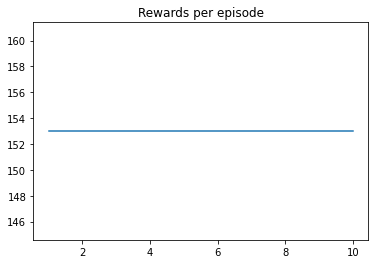

In [ ]:
#Evaluation Results

rewards = []
optimal = []
for episode in range(1, 11):
  obs = env.reset()
  reward_val = 0
  state = states[0]
  state = state.reshape(-1, 16)
  timesteps = 0
  done = False

  while timesteps < 15 and done == False: #timesteps

    action = agent.act(state, eval = True)
    action = agent.act(state)
    reward, next_state_pos, done = env.step(action, deterministic = True)

    next_state = states[states_map[tuple(next_state_pos)]]
    next_state = next_state.reshape(-1, 16)

    reward_val += reward    
    timesteps += 1

    if episode == 10:
      optimal.append(list(state[0]).index(1) + 1)
      if next_state_pos[0] == 3 and next_state_pos[1] == 3:
        optimal.append(16)

    state = next_state #new

  #after every episode
  rewards.append(reward_val)
  print("Episode: {}, Total Reward: {}".format(episode, reward_val))


print("Optimal Path: ")
for i in optimal:
  print(i,"->", end = " ")

#Plots showing episodes vs rewards
x = [episode for episode in range(1, 11)]
y_r = rewards

plt.plot(x, y_r)
plt.title("Rewards per episode")

In [ ]:
q_policy = agent.policy_model.predict(np.asarray(test_states).reshape(-1,env.observation_space.n))
q_target = agent.target_model.predict(np.asarray(test_states).reshape(-1, env.observation_space.n))
q_policy[15][:] = 0
q_target[15][:] = 0
print("After syncing weight: \n")
print("Q Policy Network: ", q_policy)
print("\n")
print("Q Target Network: ", q_target)

After syncing weight: 

Q Policy Network:  [[142.49237 138.38773 140.1182  139.72516]
 [138.03001 134.36235 139.37729 135.76157]
 [140.98224 135.88942 141.18628 136.77345]
 [144.6861  134.8353  140.57576 138.04823]
 [141.14383 135.93399 137.40475 137.38742]
 [139.34987 136.54463 141.47319 138.55681]
 [142.96642 136.5241  145.42633 139.08308]
 [147.70804 137.50888 141.40886 140.23495]
 [143.06784 137.6659  140.02457 140.46524]
 [144.32822 138.36226 144.20483 141.71915]
 [147.49847 137.99132 148.50528 141.45941]
 [150.90329 134.07047 138.78954 139.07718]
 [145.36412 143.47815 147.11334 144.63907]
 [145.32564 141.19962 149.2193  145.06976]
 [147.3869  137.02962 150.80907 141.48325]
 [  0.        0.        0.        0.     ]]


Q Target Network:  [[142.49237 138.38773 140.1182  139.72516]
 [138.03001 134.36235 139.37729 135.76157]
 [140.98224 135.88942 141.18628 136.77345]
 [144.6861  134.8353  140.57576 138.04823]
 [141.14383 135.93399 137.40475 137.38742]
 [139.34987 136.54463 141.47319 

#Part III

##Double DQN Algorithm

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                1088      
                                                                 
 dense_55 (Dense)            (None, 32)                2080      
                                                                 
 dense_56 (Dense)            (None, 4)                 132       
                                                                 
Total params: 3,300
Trainable params: 3,300
Non-trainable params: 0
_________________________________________________________________
Episode: 1, total_reward: 164
Episode: 25, total_reward: 6
Episode: 50, total_reward: 155
Episode: 75, total_reward: 161
Episode: 100, total_reward: -17
Episode: 125, total_reward: -13
Episode: 150, total_reward: 160
Episode: 175, total_reward: 163
Episode: 200, total_reward: 163
Episode: 225, total_reward: 160
Ep

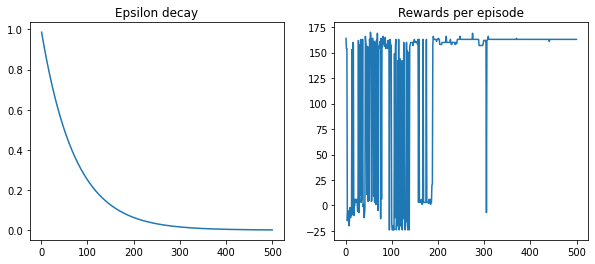

In [ ]:
# Double DQN Algorithm

class DDQN_algo:

  def __init__(self, states, actions):
    self.states = states
    self.actions = actions
    self.replay_mem = deque(maxlen = 2000)

    self.discount_rate = 0.99
    self.epsilon = 1
    self.t = 0.01

    #Policy and target networks
    self.policy_model = self.nnmodel()
    self.target_model = self.nnmodel()

    self.target_model.set_weights(self.policy_model.get_weights())
    self.policy_model.summary()

  def nnmodel(self):

    with tf.device('/device:GPU:0'):
      model = Sequential()

      model.add(Dense(64, activation='relu', input_dim = 16)) #first hidden layer with 32 nodes taking input from 16 - one hot vector of a state
      model.add(Dense(32, activation='relu')) #first hidden layer with 28 nodes taking input from the first dense layer
      model.add(Dense(4, activation='linear')) #output layers has q value for 4 actions
      model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.001))
      return model

  def store(self, state, action, reward, next_state, done):
   self.replay_mem.append((state, action, reward, next_state, done))

  def act(self, state, eval = False):

    with tf.device('/device:GPU:0'):
      rand_num = np.random.random()
      if self.epsilon > rand_num and eval == False:
        return np.random.choice(self.actions)
      else:
        action_values = self.policy_model.predict(state)
        return np.argmax(action_values[0])

  def replay(self, batch_size):

    if len(self.replay_mem) < batch_size:
      return
    with tf.device('/device:GPU:0'):
      minibatch = random.sample(self.replay_mem, batch_size)
      
      temp_states = np.array([sample[0] for sample in minibatch])
      temp_next_states = np.array([sample[3] for sample in minibatch])

      policy_qvals = self.policy_model.predict(temp_states.reshape(-1, env.observation_space.n))
      target_qvals = self.target_model.predict(temp_next_states.reshape(-1, env.observation_space.n))

      X = []
      y = []

    
      for index, (s0, action, reward, s1, done) in enumerate(minibatch):

        if not done:
          action_val = np.argmax(policy_qvals[index])
          y_target = reward + self.discount_rate*target_qvals[index][action_val]

        else:
          y_target = reward

        q_val = policy_qvals[index]
        q_val[action] = y_target

        X.append(s0)
        y.append(q_val)

      self.policy_model.fit(np.array(X).reshape(-1, env.observation_space.n), np.array(y), batch_size = batch_size, verbose = 0)


  def sync_weights(self):

    for target_param, param in zip(self.target_model.trainable_variables, self.policy_model.trainable_variables):
        target_param.assign(self.t * param + (1 - self.t) * target_param)

    # self.target_model.set_weights(self.t * self.policy_model.get_weights() + (1-self.t) * self.target_model.get_weights) 


#Main details:
states_map = {(0,0): 0, (0,1): 1, (0,2): 2, (0,3): 3,
                  (1,0): 4, (1,1): 5, (1,2): 6, (1,3): 7,
                  (2,0): 8, (2,1): 9, (2,2): 10, (2,3): 11,
                  (3,0): 12, (3,1): 13, (3,2): 14, (3,3): 15}

actions = [0,1,2,3]

states = [x for x in range(env.observation_space.n)]

states = tf.keras.utils.to_categorical(states)

agent = DDQN_algo(states, actions)

with tf.device('/device:GPU:0'):
  episodes = 500 #Num of episodes 2500 worked best try 1000: 250 gave diff optimal
  batch_size = 128 #Minibatch size
  c = 5 #sync weights every 2 episodes
  rewards = []
  epsilon_values = []
  
  epsilon_decay = (0.001/1)**(1/episodes)
  target = np.array([3,3])

  for episode in range(1, episodes+1):
    obs = env.reset()
    total_reward = 0
    state = states[0]
    state = state.reshape(-1, 16)
    timesteps = 0
    optimal = []
    val = []
    # previous = np.array([0,0])
    done = False

    while timesteps < 15 and done == False: #timesteps

      action = agent.act(state)
      reward, next_state_pos, done = env.step(action, deterministic = True)
      
      next_state = states[states_map[tuple(next_state_pos)]]
      next_state = next_state.reshape(-1, 16)

  
      if list(state[0]).index(1) == list(next_state[0]).index(1): #same state
        reward = reward - 2  #before -1

      if np.linalg.norm(target - np.array(next_state_pos)) <= 1:
        reward = reward + 5  #before +1, 5 is good
      

      agent.store(state, action, reward, next_state, done)
      timesteps += 1
      total_reward += reward

      if timesteps == 5:
        agent.replay(batch_size)  #training the model
      state = next_state #new

      #end of timesteps or terminal reached

    #after every episode
    if episode % c == 0:
        agent.sync_weights()
    
    if agent.epsilon > 0.001:
        agent.epsilon *= epsilon_decay
    else:
        agent.epsilon = 0.001

    
    epsilon_values.append(agent.epsilon)
    rewards.append(total_reward)

    if episode % (episodes//20) == 0 or episode == 1:
      print("Episode: {}, total_reward: {}".format(episode, total_reward))


  #plotting
  x = [episode for episode in range(1, episodes+1)]
  y_e = epsilon_values 
  y_r = rewards

  #Plots showing episodes vs epsilon, episodes vs rewards
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  #episodes vs epsilon
  ax1.plot(x, y_e)
  ax1.set_title("Epsilon decay")


  #episodes vs rewards
  ax2.plot(x,y_r)
  ax2.set_title("Rewards per episode")

  #time taken: faster

Episode: 1, Total Reward: 153
Episode: 2, Total Reward: 153
Episode: 3, Total Reward: 153
Episode: 4, Total Reward: 153
Episode: 5, Total Reward: 153
Episode: 6, Total Reward: 153
Episode: 7, Total Reward: 153
Episode: 8, Total Reward: 153
Episode: 9, Total Reward: 153
Episode: 10, Total Reward: 153
Optimal Path: 
1 -> 5 -> 9 -> 13 -> 14 -> 15 -> 16 -> 

Text(0.5, 1.0, 'Rewards per episode')

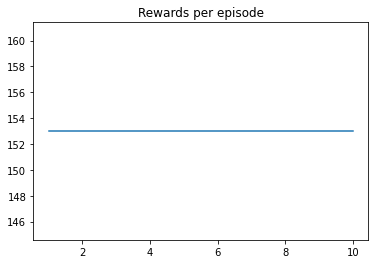

In [ ]:
#Evaluation Results

rewards = []
optimal = []
for episode in range(1, 11):
  obs = env.reset()
  reward_val = 0
  state = states[0]
  state = state.reshape(-1, 16)
  timesteps = 0
  done = False

  while timesteps < 15 and done == False: #timesteps

    action = agent.act(state, eval = True)
    action = agent.act(state)
    reward, next_state_pos, done = env.step(action, deterministic = True)

    next_state = states[states_map[tuple(next_state_pos)]]
    next_state = next_state.reshape(-1, 16)

    reward_val += reward    
    timesteps += 1

    if episode == 10:
      optimal.append(list(state[0]).index(1) + 1)
      if next_state_pos[0] == 3 and next_state_pos[1] == 3:
        optimal.append(16)

    state = next_state #new

  #after every episode
  rewards.append(reward_val)
  print("Episode: {}, Total Reward: {}".format(episode, reward_val))


print("Optimal Path: ")
for i in optimal:
  print(i,"->", end = " ")

#Plots showing episodes vs rewards
x = [episode for episode in range(1, 11)]
y_r = rewards

plt.plot(x, y_r)
plt.title("Rewards per episode")

In [ ]:
q_policy = agent.policy_model.predict(np.asarray(test_states).reshape(-1,env.observation_space.n))
q_target = agent.target_model.predict(np.asarray(test_states).reshape(-1, env.observation_space.n))
q_policy[15][:] = 0
q_target[15][:] = 0
print("After syncing weight: \n")
print("Q Policy Network: ", q_policy)
print("\n")
print("Q Target Network: ", q_target)
#4 actions:  {0: down, 1: up, 2: right, 3: left}

After syncing weight: 

Q Policy Network:  [[ 1.8441316e+00 -5.0909317e-01  8.2933724e-01 -8.0595589e-01]
 [ 2.4143901e-01 -5.0365937e-01  1.1909426e+00 -5.2610219e-01]
 [ 1.3856739e-02 -1.6216627e-01 -4.6003062e-01  3.7363744e-01]
 [ 4.5564790e+00 -3.7270457e-02  1.1932907e+00 -7.6527625e-01]
 [ 3.0801525e+00  5.1623434e-02  2.9376826e-01 -9.6890712e-01]
 [-4.8806623e-01  3.7519917e-01 -5.0151360e-01 -2.2815464e-01]
 [-1.7453083e+00  3.8703284e-01 -9.3956053e-01  3.8682747e-01]
 [ 2.5214766e+01  1.6909717e+00  1.8739552e+01  8.2859707e-01]
 [ 2.5914030e+00  8.8196290e-01  3.3833370e-01 -4.5983851e-02]
 [-4.3377236e-01  3.1803688e-01 -2.2075112e+00  2.2509067e-01]
 [ 2.3761450e+01  1.4112726e+00  2.3771786e+01  8.3931088e-01]
 [ 1.5515628e+02  5.1879826e+00  1.4981509e+02  3.1661425e+00]
 [ 7.9240215e-01  1.7529975e+00  4.4197531e+00  8.1009090e-01]
 [ 2.3717623e+01  1.9613642e+00  2.7346346e+01  2.0755515e+00]
 [ 1.3337373e+02  3.0036376e+00  1.5504010e+02  2.8800783e+00]
 [ 0.0000000

##DQN on Cart Pole-v1

In [ ]:
env = gym.make('CartPole-v1')
env.reset()
print(env.action_space)
print(env.observation_space)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                160       
                                                                 
 dense_43 (Dense)            (None, 24)                792       
                                                                 
 dense_44 (Dense)            (None, 2)                 50        
                                                                 
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________
Episode: 1, Total reward: 28, Average reward: 0
Episode: 5, Total reward: 16, Average reward: 0
Episode: 10, Total reward: 10, Average reward: 18.8
Episode: 15, Total reward: 23, Average reward: 19.5
Episode: 20, Total reward: 47, Average reward: 36.8
Episode: 25, Total reward: 71, Average reward: 56.0
Episode: 30

Text(0.5, 1.0, 'Rewards per episode')

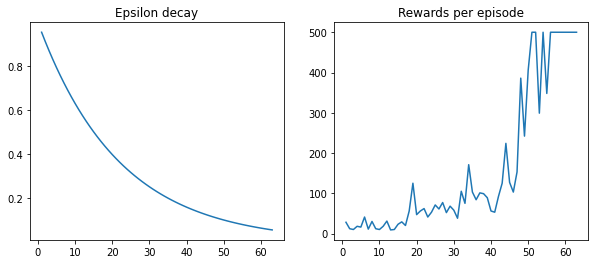

In [ ]:
#DQN Algorithm

class DQN_algocartpole:

  def __init__(self):
    self.env = gym.make('CartPole-v1')
    self.states_size = self.env.observation_space.shape[0]
    self.actions_size = self.env.action_space.n
    self.replay_mem = deque(maxlen = 5000)

    self.discount_rate = 0.99
    self.epsilon = 1
    
    #Policy and target networks
    self.policy_model = self.nnmodel()
    self.target_model = self.nnmodel()

    self.target_model.set_weights(self.policy_model.get_weights())
    self.policy_model.summary()

  def nnmodel(self):

    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim = self.states_size)) #first hidden layer with 32 nodes taking input from 16 - one hot vector of a state
    model.add(Dense(24, activation='relu')) #first hidden layer with 28 nodes taking input from the first dense layer
    model.add(Dense(self.actions_size, activation='linear')) #output layers has q value for 4 actions
    model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.001))
    return model

  def store(self, state, action, reward, next_state, done):
   self.replay_mem.append((state, action, reward, next_state, done))

  def act(self, state, eval = False):

      rand_num = np.random.random()
      if self.epsilon > rand_num and eval == False:
        return np.random.choice(agent.actions_size)
      else:
        action_values = self.policy_model.predict(state)
        return np.argmax(action_values[0])

  def replay(self, batch_size):

    if len(self.replay_mem) < batch_size:
      return
    
    minibatch = random.sample(self.replay_mem, batch_size)
    temp_states = np.array([sample[0] for sample in minibatch])
    temp_next_states = np.array([sample[3] for sample in minibatch])

    policy_qvals = self.policy_model.predict(temp_states.reshape(-1, self.states_size))
    target_qvals = self.target_model.predict(temp_next_states.reshape(-1, self.states_size))

    X = []
    y = []

    for index, (s0, action, reward, s1, done) in enumerate(minibatch):

      if not done:    
         y_target = reward + self.discount_rate * np.max(target_qvals[index])
      else:
         y_target = reward

      q_val = policy_qvals[index]
      q_val[action] = y_target
      X.append(s0)
      y.append(q_val)

    self.policy_model.fit(np.array(X).reshape(-1, self.states_size), np.array(y), batch_size = batch_size, verbose = 0)

  def sync_weights(self):
    self.target_model.set_weights(self.policy_model.get_weights()) 


#Agent declaration
agent = DQN_algocartpole()

episodes = 100 #Num of episodes: 100 worked best
batch_size = 128 #Minibatch size
c = 3 #sync weights every 3 episodes
rewards = []
epsilon_values = []
epsilon_decay = (0.001/1)**(1/episodes)

avg_reward = 0

for episode in range(1, episodes+1):
  
  state = agent.env.reset()
  reward_val = 0
  timesteps = 0
  state = np.reshape(state, [1, agent.states_size])
  done = False

  while done == False:

   
    action = agent.act(state)

    next_state, reward, done, _ = agent.env.step(action)
    next_state = np.reshape(next_state, [1, agent.states_size])

    reward = -100*(abs(next_state[0,2]) - abs(state[0,2]))
    agent.store(state, action, reward, next_state, done)

    reward_val += 1
    timesteps += 1
    
    if timesteps % 5 == 0:
      agent.replay(batch_size)  #training the model

    state = next_state #new

    #end of timesteps or terminated


  #after every episode
  
  if episode % c == 0:
      agent.sync_weights()

  if agent.epsilon > 0.001:
      agent.epsilon *= epsilon_decay
  else:
      agent.epsilon = 0.001
  
  epsilon_values.append(agent.epsilon)
  rewards.append(reward_val)
  
  #Average reward over last 10 episodes:
  if episode >= 10:
    avg_reward = np.sum(rewards[episode-10:])/10

  if episode % (episodes//20) == 0 or episode == 1:
    print("Episode: {}, Total reward: {}, Average reward: {}".format(episode, reward_val, avg_reward))   

  #Optimal reward checking
  if avg_reward > 470:
    print("Average above 470 Reached!!")
    break

#plotting
x = [e for e in range(1, episode+1)]
y_e = epsilon_values 
y_r = rewards

#Plots showing episodes vs epsilon, episodes vs rewards
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
#episodes vs epsilon
ax1.plot(x, y_e)
ax1.set_title("Epsilon decay")

#episodes vs rewards
ax2.plot(x,y_r)
ax2.set_title("Rewards per episode")



Episode: 1, Total Reward: 500
Episode: 2, Total Reward: 500
Episode: 3, Total Reward: 500
Episode: 4, Total Reward: 500
Episode: 5, Total Reward: 500
Episode: 6, Total Reward: 500
Episode: 7, Total Reward: 500
Episode: 8, Total Reward: 500
Episode: 9, Total Reward: 500
Episode: 10, Total Reward: 500


Text(0.5, 1.0, 'Rewards per episode')

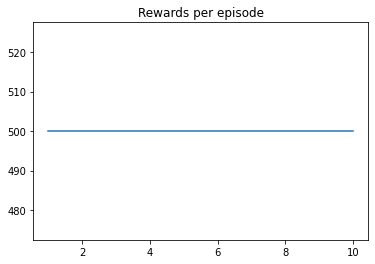

In [ ]:
#Evaluation Results
rewards = []
for episode in range(1, 11):
  
  state = agent.env.reset()
  reward_val = 0
  state = np.reshape(state, [1, agent.states_size])
  done = False

  while done == False:

    action = agent.act(state, eval = True)

    next_state, reward, done, _ = agent.env.step(action)
    next_state = np.reshape(next_state, [1, agent.states_size])
    reward_val += 1
    state = next_state #new

    #terminated
  
  #after every episode
  rewards.append(reward_val)
  print("Episode: {}, Total Reward: {}".format(episode, reward_val))

#Plots showing episodes vs rewards
x = [episode for episode in range(1, 11)]
y = rewards

plt.plot(x, y)
plt.title("Rewards per episode")

##DQN on Mountain Car-v0

In [ ]:
env = gym.make('MountainCar-v0')
env.reset()
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 3)                 75        
                                                                 
Total params: 963
Trainable params: 963
Non-trainable params: 0
_________________________________________________________________
Episode: 1, Average reward: -200, Average timesteps: 200
Episode: 50, Average reward: -200.0, Average timesteps: 200.0
Episode: 100, Average reward: -200.0, Average timesteps: 200.0
Episode: 150, Average reward: -174.1, Average timesteps: 174.1
Episode: 200, Average reward: -165.7, Average timesteps: 165.7
Episode: 250, 

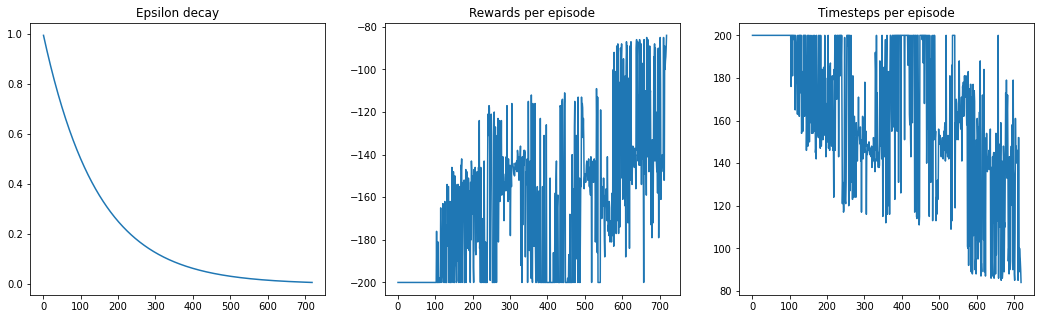

In [ ]:
start = timeit.timeit()
tf.autograph.set_verbosity(0)
tf.autograph.experimental.do_not_convert
#DQN Algorithm on Mountain Car env

class DQN_algomountaincar:

  def __init__(self):
    self.env = gym.make('MountainCar-v0')
    self.states_size = self.env.observation_space.shape[0]
    self.actions_size = self.env.action_space.n
    self.replay_mem = deque(maxlen = 5000)

    self.discount_rate = 0.99
    self.epsilon = 1
    
    #Policy and target networks
    self.policy_model = self.nnmodel()
    self.target_model = self.nnmodel()

    self.target_model.set_weights(self.policy_model.get_weights())
    self.policy_model.summary()

  def nnmodel(self):

    with tf.device('/gpu:0'):
      model = Sequential()
      model.add(Dense(32, activation='relu', input_dim = self.states_size)) #first hidden layer with 32 nodes taking input from 16 - one hot vector of a state
      model.add(Dense(24, activation='relu')) #first hidden layer with 28 nodes taking input from the first dense layer
      model.add(Dense(self.actions_size, activation='linear')) #output layers has q value for 4 actions
      model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.001))
      return model

  def store(self, state, action, reward, next_state, done):
   self.replay_mem.append((state, action, reward, next_state, done))

  def act(self, state, eval = False):
     with tf.device('/gpu:0'):
       rand_num = np.random.random()
       if self.epsilon > rand_num and eval == False:
         return np.random.choice(agent.actions_size)
       else:
         action_values = self.policy_model.predict(state)
         return np.argmax(action_values[0])

  @tf.autograph.experimental.do_not_convert
  def replay(self, batch_size):
   
    with tf.device('/gpu:0'):

      if len(self.replay_mem) < batch_size:
        return
      
      minibatch = random.sample(self.replay_mem, batch_size)
      temp_states = np.array([sample[0] for sample in minibatch])
      temp_next_states = np.array([sample[3] for sample in minibatch])

      policy_qvals = self.policy_model.predict(temp_states.reshape(-1, self.states_size))
      target_qvals = self.target_model.predict(temp_next_states.reshape(-1, self.states_size))

      X = []
      y = []

      for index, (s0, action, reward, s1, done) in enumerate(minibatch):

        if not done:    
          y_target = reward + self.discount_rate * np.max(target_qvals[index])
        else:
          y_target = reward

        q_val = policy_qvals[index]
        q_val[action] = y_target
        X.append(s0)
        y.append(q_val)

      self.policy_model.fit(np.array(X).reshape(-1, self.states_size), np.array(y), batch_size = batch_size, verbose = 0)

  def sync_weights(self):
    self.target_model.set_weights(self.policy_model.get_weights()) 


#Agent declaration
agent = DQN_algomountaincar()

episodes = 1000 #Num of episodes 1000
batch_size = 128 #Minibatch size
c = 3 #sync weights every 3 episodes
rewards = []
epsilon_values = []
epsilon_decay = (0.001/1)**(1/episodes)

avg_timesteps = 200
avg_reward = -200
total_timesteps = []

for episode in range(1, episodes+1):
  
  state = agent.env.reset()
  total_reward = 0
  reward_val = 0
  timesteps = 0
  state = np.reshape(state, [1, agent.states_size])
  done = False

  while done == False:
    
    with tf.device('/gpu:0'):
      action = agent.act(state)

      next_state, reward, done, _ = agent.env.step(action)
      reward_val = reward
      next_state = np.reshape(next_state, [1, agent.states_size])

      #different reward for faster convergence
      reward = 100*((math.sin(3*next_state[0,0]) * 0.0025 + 0.5 * next_state[0,1] * next_state[0,1]) - (math.sin(3*state[0,0]) * 0.0025 + 0.5 * state[0,1] * state[0,1]))
      
      agent.store(state, action, reward, next_state, done)

      timesteps += 1
      total_reward += reward_val

      if timesteps % 5 == 0:
        agent.replay(batch_size)  #training the model

      state = next_state #new

    #end of timesteps or terminated
    
  #after every episode
  
  if episode % c == 0:
      agent.sync_weights()

  if agent.epsilon > 0.001:
      agent.epsilon *= epsilon_decay
  else:
      agent.epsilon = 0.001
  
  epsilon_values.append(agent.epsilon)
  rewards.append(total_reward)
  total_timesteps.append(timesteps)
  
  #Average reward over last 10 episodes:
  if episode >= 10:
    avg_timesteps = np.sum(total_timesteps[episode-10:])/10
    avg_reward = np.sum(rewards[episode-10:])/10

  if episode % (episodes//20) == 0 or episode == 1:
    print("Episode: {}, Average reward: {}, Average timesteps: {}".format(episode, avg_reward, avg_timesteps))   

  #Optimal timesteps checking #strict condition is avg_reward = -110 in 100 runs 
  if avg_reward > -110:
    print("Car reached the top of the hill!!")
    break

#plotting
x = [e for e in range(1, episode+1)]
y_e = epsilon_values 
y_t = total_timesteps
y_r = rewards

#Plots showing episodes vs epsilon, episodes vs rewards
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
#episodes vs epsilon
ax1.plot(x, y_e)
ax1.set_title("Epsilon decay")

#episodes vs rewards
ax2.plot(x, y_r)
ax2.set_title("Rewards per episode")

#episodes vs timesteps
ax3.plot(x,y_t)
ax3.set_title("Timesteps per episode")

end = timeit.timeit()
print("Time taken: ", end - start)
#time taken: 1:30 for 500 episodes

Episode: 1, Total Reward: -87.0, Timesteps: 87
Episode: 2, Total Reward: -163.0, Timesteps: 163
Episode: 3, Total Reward: -87.0, Timesteps: 87
Episode: 4, Total Reward: -139.0, Timesteps: 139
Episode: 5, Total Reward: -154.0, Timesteps: 154
Episode: 6, Total Reward: -166.0, Timesteps: 166
Episode: 7, Total Reward: -89.0, Timesteps: 89
Episode: 8, Total Reward: -153.0, Timesteps: 153
Episode: 9, Total Reward: -135.0, Timesteps: 135
Episode: 10, Total Reward: -149.0, Timesteps: 149


Text(0.5, 1.0, 'Timesteps per episode')

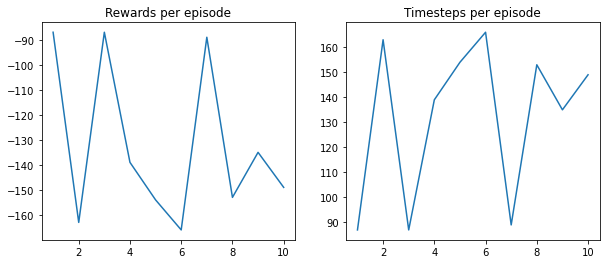

In [ ]:
#Evaluation Results
total_timesteps = []
rewards = []
for episode in range(1, 11):
  
  state = agent.env.reset()
  timesteps = 0
  reward_val = 0
  state = np.reshape(state, [1, agent.states_size])
  done = False

  while done == False:

    action = agent.act(state, eval = True)

    next_state, reward, done, _ = agent.env.step(action)
    reward_val += reward
    next_state = np.reshape(next_state, [1, agent.states_size])
    timesteps += 1
    state = next_state #new

    #terminated
  
  #after every episode
  rewards.append(reward_val)
  total_timesteps.append(timesteps)
  print("Episode: {}, Total Reward: {}, Timesteps: {}".format(episode, reward_val, timesteps))

#Plots showing episodes vs rewards
x = [episode for episode in range(1, 11)]
y_t = total_timesteps
y_r = rewards

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
#episodes vs reward
ax1.plot(x, y_r)
ax1.set_title("Rewards per episode")

#episodes vs rewards
ax2.plot(x, y_t)
ax2.set_title("Timesteps per episode")

##Double DQN on Cart Pole-v1

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                160       
                                                                 
 dense_19 (Dense)            (None, 24)                792       
                                                                 
 dense_20 (Dense)            (None, 2)                 50        
                                                                 
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________
Episode: 1, Total reward: 9, Average reward: 0
Episode: 50, Total reward: 23, Average reward: 16.0
Episode: 100, Total reward: 18, Average reward: 22.7
Episode: 150, Total reward: 22, Average reward: 23.9
Episode: 200, Total reward: 104, Average reward: 76.8
Episode: 250, Total reward: 155, Average reward: 120.3
Ep

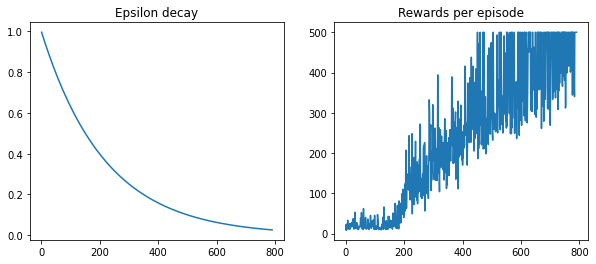

In [ ]:
start = timeit.timeit()
#Double DQN Algorithm
class DDQN_algocartpole:

  def __init__(self):
    self.env = gym.make('CartPole-v1')
    self.states_size = self.env.observation_space.shape[0]
    self.actions_size = self.env.action_space.n
    self.replay_mem = deque(maxlen = 5000)

    self.discount_rate = 0.99
    self.epsilon = 1
    self.t = 0.01
    
    #Policy and target networks
    self.policy_model = self.nnmodel()
    self.target_model = self.nnmodel()

    self.target_model.set_weights(self.policy_model.get_weights())
    self.policy_model.summary()

  def nnmodel(self):

    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim = self.states_size)) #first hidden layer with 32 nodes taking input from 16 - one hot vector of a state
    model.add(Dense(24, activation='relu')) #first hidden layer with 28 nodes taking input from the first dense layer
    model.add(Dense(self.actions_size, activation='linear')) #output layers has q value for 4 actions
    model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.001))
    return model

  def store(self, state, action, reward, next_state, done):
   self.replay_mem.append((state, action, reward, next_state, done))

  def act(self, state, eval = False):

      rand_num = np.random.random()
      if self.epsilon > rand_num and eval == False:
        return np.random.choice(agent.actions_size)
      else:
        action_values = self.policy_model.predict(state)
        return np.argmax(action_values[0])

  def replay(self, batch_size):

    if len(self.replay_mem) < batch_size:
      return
    
    minibatch = random.sample(self.replay_mem, batch_size)
    temp_states = np.array([sample[0] for sample in minibatch])
    temp_next_states = np.array([sample[3] for sample in minibatch])

    policy_qvals = self.policy_model.predict(temp_states.reshape(-1, self.states_size))
    target_qvals = self.target_model.predict(temp_next_states.reshape(-1, self.states_size))

    X = []
    y = []

    for index, (s0, action, reward, s1, done) in enumerate(minibatch):

      if not done:    
         action_val = np.argmax(policy_qvals[index])
         y_target = reward + self.discount_rate*target_qvals[index][action_val]

      else:
         y_target = reward

      q_val = policy_qvals[index]
      q_val[action] = y_target
      X.append(s0)
      y.append(q_val)

    self.policy_model.fit(np.array(X).reshape(-1, self.states_size), np.array(y), batch_size = batch_size, verbose = 0)

  def sync_weights(self):
    for target_param, param in zip(self.target_model.trainable_variables, self.policy_model.trainable_variables):
        target_param.assign(self.t * param + (1 - self.t) * target_param)


#Agent declaration
agent = DDQN_algocartpole()

episodes = 1000 #Num of episodes: 100 worked good for DQN on cart
batch_size = 128 #Minibatch size
c = 3 #sync weights every 3 episodes
rewards = []
epsilon_values = []
epsilon_decay = (0.01/1)**(1/episodes)

avg_reward = 0

for episode in range(1, episodes+1):
  
  state = agent.env.reset()
  reward_val = 0
  timesteps = 0
  state = np.reshape(state, [1, agent.states_size])
  done = False

  while done == False:

   
    action = agent.act(state)

    next_state, reward, done, _ = agent.env.step(action)
    next_state = np.reshape(next_state, [1, agent.states_size])

    reward = -100*(abs(next_state[0,2]) - abs(state[0,2]))
    agent.store(state, action, reward, next_state, done)

    reward_val += 1
    timesteps += 1
    
    if timesteps % 5 == 0:
      agent.replay(batch_size)  #training the model

    state = next_state #new

    #end of timesteps or terminated


  #after every episode
  
  if episode % c == 0:
      agent.sync_weights()

  if agent.epsilon > 0.001:
      agent.epsilon *= epsilon_decay
  else:
      agent.epsilon = 0.001
  
  epsilon_values.append(agent.epsilon)
  rewards.append(reward_val)
  
  #Average reward over last 10 episodes:
  if episode >= 10:
    avg_reward = np.sum(rewards[episode-10:])/10

  if episode % (episodes//20) == 0 or episode == 1:
    print("Episode: {}, Total reward: {}, Average reward: {}".format(episode, reward_val, avg_reward))   

  #Optimal reward checking
  if avg_reward > 470:
    print("Average above 470 Reached!!")
    break

#plotting
x = [e for e in range(1, episode+1)]
y_e = epsilon_values 
y_r = rewards

#Plots showing episodes vs epsilon, episodes vs rewards
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
#episodes vs epsilon
ax1.plot(x, y_e)
ax1.set_title("Epsilon decay")

#episodes vs rewards
ax2.plot(x,y_r)
ax2.set_title("Rewards per episode")
end = timeit.timeit()

print("Time taken: ", end - start)
#500 episodes: 1:34

Episode: 1, Total Reward: 500
Episode: 2, Total Reward: 500
Episode: 3, Total Reward: 500
Episode: 4, Total Reward: 500
Episode: 5, Total Reward: 386
Episode: 6, Total Reward: 500
Episode: 7, Total Reward: 442
Episode: 8, Total Reward: 382
Episode: 9, Total Reward: 500
Episode: 10, Total Reward: 422


Text(0.5, 1.0, 'Rewards per episode')

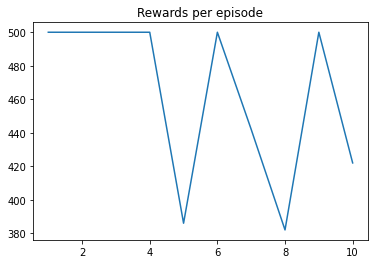

In [ ]:
#Evaluation Results
rewards = []
for episode in range(1, 11):
  
  state = agent.env.reset()
  reward_val = 0
  state = np.reshape(state, [1, agent.states_size])
  done = False

  while done == False:

    action = agent.act(state, eval = True)

    next_state, reward, done, _ = agent.env.step(action)
    next_state = np.reshape(next_state, [1, agent.states_size])
    reward_val += 1
    state = next_state #new

    #terminated
  
  #after every episode
  rewards.append(reward_val)
  print("Episode: {}, Total Reward: {}".format(episode, reward_val))

#Plots showing episodes vs rewards
x = [episode for episode in range(1, 11)]
y = rewards

plt.plot(x, y)
plt.title("Rewards per episode")

##Double DQN on Mountain Car-v0

In [ ]:
env = gym.make('MountainCar-v0')
env.reset()
print(env.action_space)
print(env.observation_space)

Discrete(3)
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 963
Trainable params: 963
Non-trainable params: 0
_________________________________________________________________


/projects/academic/courses/cse546s22/nkarnati/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(values, collections.Sequence):


Episode: 1, Average reward: -200, Average timesteps: 200
Episode: 50, Average reward: -200.0, Average timesteps: 200.0
Episode: 100, Average reward: -200.0, Average timesteps: 200.0
Episode: 150, Average reward: -200.0, Average timesteps: 200.0
Episode: 200, Average reward: -200.0, Average timesteps: 200.0
Episode: 250, Average reward: -200.0, Average timesteps: 200.0
Episode: 300, Average reward: -200.0, Average timesteps: 200.0
Episode: 350, Average reward: -200.0, Average timesteps: 200.0
Episode: 400, Average reward: -200.0, Average timesteps: 200.0
Episode: 450, Average reward: -200.0, Average timesteps: 200.0
Episode: 500, Average reward: -197.7, Average timesteps: 197.7
Episode: 550, Average reward: -198.7, Average timesteps: 198.7
Episode: 600, Average reward: -198.3, Average timesteps: 198.3
Episode: 650, Average reward: -195.4, Average timesteps: 195.4
Episode: 700, Average reward: -199.5, Average timesteps: 199.5
Episode: 750, Average reward: -181.2, Average timesteps: 181.2

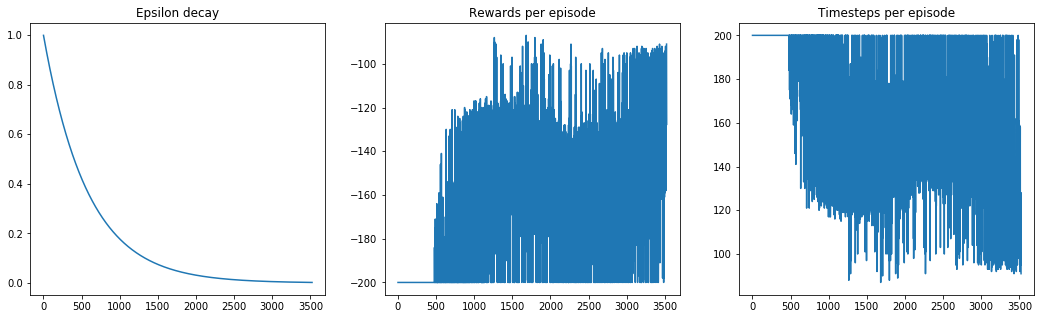

In [ ]:
start = timeit.timeit()
#DQN Algorithm on Mountain Car env

class DDQN_algomountaincar:

  def __init__(self):
    self.env = gym.make('MountainCar-v0')
    self.states_size = self.env.observation_space.shape[0]
    self.actions_size = self.env.action_space.n
    self.replay_mem = deque(maxlen = 5000)

    self.discount_rate = 0.99
    self.epsilon = 1
    self.t = 0.01
    
    #Policy and target networks
    self.policy_model = self.nnmodel()
    self.target_model = self.nnmodel()

    self.target_model.set_weights(self.policy_model.get_weights())
    self.policy_model.summary()

  def nnmodel(self):

    with tf.device('/device:GPU:0'):

      model = Sequential()
      model.add(Dense(32, activation='relu', input_dim = self.states_size)) #first hidden layer with 32 nodes taking input from 16 - one hot vector of a state
      model.add(Dense(24, activation='relu')) #first hidden layer with 28 nodes taking input from the first dense layer
      model.add(Dense(self.actions_size, activation='linear')) #output layers has q value for 4 actions
      model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.001))
      return model

  def store(self, state, action, reward, next_state, done):
   self.replay_mem.append((state, action, reward, next_state, done))

  def act(self, state, eval = False):

    with tf.device('/device:GPU:0'):
      rand_num = np.random.random()
      if self.epsilon > rand_num and eval == False:
        return np.random.choice(agent.actions_size)
      else:
        action_values = self.policy_model.predict(state)
        return np.argmax(action_values[0])

  def replay(self, batch_size):
    with tf.device('/device:GPU:0'):

      if len(self.replay_mem) < batch_size:
        return
      
      minibatch = random.sample(self.replay_mem, batch_size)
      temp_states = np.array([sample[0] for sample in minibatch])
      temp_next_states = np.array([sample[3] for sample in minibatch])

      policy_qvals = self.policy_model.predict(temp_states.reshape(-1, self.states_size))
      target_qvals = self.target_model.predict(temp_next_states.reshape(-1, self.states_size))

      X = []
      y = []

      for index, (s0, action, reward, s1, done) in enumerate(minibatch):

        if not done:    
          action_val = np.argmax(policy_qvals[index])
          y_target = reward + self.discount_rate*target_qvals[index][action_val]
        else:
          y_target = reward

        q_val = policy_qvals[index]
        q_val[action] = y_target
        X.append(s0)
        y.append(q_val)

      self.policy_model.fit(np.array(X).reshape(-1, self.states_size), np.array(y), batch_size = batch_size, epochs = 3, verbose = 0)

  def sync_weights(self):
    for target_param, param in zip(self.target_model.trainable_variables, self.policy_model.trainable_variables):
        target_param.assign(self.t * param + (1 - self.t) * target_param) 


#Agent declaration
agent = DDQN_algomountaincar()

with tf.device('/device:GPU:0'):

  episodes = 4000 #Num of episodes 1000... 200 for every time training
  batch_size = 128 #Minibatch size
  c = 3 #sync weights every 3 episodes
  rewards = []
  epsilon_values = []
  epsilon_decay = (0.001/1)**(1/episodes)

  avg_timesteps = 200
  avg_reward = -200
  total_timesteps = []

  for episode in range(1, episodes+1):
    
    state = agent.env.reset()
    total_reward = 0
    reward_val = 0
    timesteps = 0
    state = np.reshape(state, [1, agent.states_size])
    done = False

    while done == False:

      action = agent.act(state)

      next_state, reward, done, _ = agent.env.step(action)
      reward_val = reward
      next_state = np.reshape(next_state, [1, agent.states_size])

      #different reward for faster convergence
      reward = 100*((math.sin(3*next_state[0,0]) * 0.0025 + 0.5 * next_state[0,1] * next_state[0,1]) - (math.sin(3*state[0,0]) * 0.0025 + 0.5 * state[0,1] * state[0,1]))
      
      agent.store(state, action, reward, next_state, done)

      timesteps += 1
      total_reward += reward_val
      
      if timesteps % 5 == 0: #reduce maybe better performance
        agent.replay(batch_size)  #training the model

      state = next_state #new

      #end of timesteps or terminated
      
    #after every episode
    
    if episode % c == 0:
        agent.sync_weights()

    if agent.epsilon > 0.001:
        agent.epsilon *= epsilon_decay
    else:
        agent.epsilon = 0.001
    
    epsilon_values.append(agent.epsilon)
    rewards.append(total_reward)
    total_timesteps.append(timesteps)
    
    #Average reward over last 10 episodes:
    if episode >= 10:
      avg_timesteps = np.sum(total_timesteps[episode-10:])/10
      avg_reward = np.sum(rewards[episode-10:])/10

    if episode % (episodes//80) == 0 or episode == 1:
      print("Episode: {}, Average reward: {}, Average timesteps: {}".format(episode, avg_reward, avg_timesteps))   

    #Optimal timesteps checking #strict condition is avg_reward = -110 in 100 runs 
    if avg_reward > -110:
      print("Car reached the top of the hill!!")
      break

  #plotting
  x = [e for e in range(1, episode+1)]
  y_e = epsilon_values 
  y_t = total_timesteps
  y_r = rewards

  #Plots showing episodes vs epsilon, episodes vs rewards
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
  #episodes vs epsilon
  ax1.plot(x, y_e)
  ax1.set_title("Epsilon decay")

  #episodes vs rewards
  ax2.plot(x, y_r)
  ax2.set_title("Rewards per episode")

  #episodes vs timesteps
  ax3.plot(x,y_t)
  ax3.set_title("Timesteps per episode")

  end = timeit.timeit()
  print("Time taken: ", end - start)
  #time taken: 4:30 for 4000 episodes

Episode: 1, Total Reward: -128.0, Timesteps: 128
Episode: 2, Total Reward: -129.0, Timesteps: 129
Episode: 3, Total Reward: -111.0, Timesteps: 111
Episode: 4, Total Reward: -127.0, Timesteps: 127
Episode: 5, Total Reward: -112.0, Timesteps: 112
Episode: 6, Total Reward: -98.0, Timesteps: 98
Episode: 7, Total Reward: -134.0, Timesteps: 134
Episode: 8, Total Reward: -132.0, Timesteps: 132
Episode: 9, Total Reward: -135.0, Timesteps: 135
Episode: 10, Total Reward: -98.0, Timesteps: 98


Text(0.5, 1.0, 'Timesteps per episode')

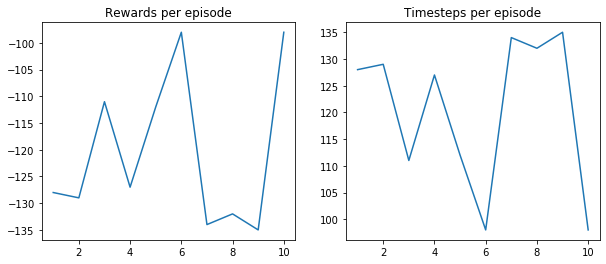

In [ ]:
#Evaluation Results
total_timesteps = []
rewards = []
for episode in range(1, 11):
  
  state = agent.env.reset()
  timesteps = 0
  reward_val = 0
  state = np.reshape(state, [1, agent.states_size])
  done = False

  while done == False:

    action = agent.act(state, eval = True)

    next_state, reward, done, _ = agent.env.step(action)
    reward_val += reward
    next_state = np.reshape(next_state, [1, agent.states_size])
    timesteps += 1
    state = next_state #new

    #terminated
  
  #after every episode
  rewards.append(reward_val)
  total_timesteps.append(timesteps)
  print("Episode: {}, Total Reward: {}, Timesteps: {}".format(episode, reward_val, timesteps))

#Plots showing episodes vs rewards
x = [episode for episode in range(1, 11)]
y_t = total_timesteps
y_r = rewards

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
#episodes vs reward
ax1.plot(x, y_r)
ax1.set_title("Rewards per episode")

#episodes vs rewards
ax2.plot(x, y_t)
ax2.set_title("Timesteps per episode")